In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [2]:
#data = pd.read_csv(r"https://www.kaggle.com/datasets/uciml/indian-liver-patient-records")
# download the dataset using the above link and copy paste the link here

In [3]:
data = pd.read_csv("indian_liver_patient.csv")
# download the dataset using the above link and copy paste the link here

In [4]:
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


<Axes: >

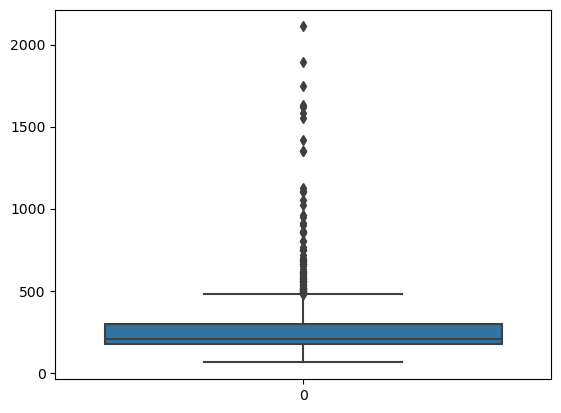

In [5]:
sns.boxplot(data['Alkaline_Phosphotase'])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [7]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [8]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [9]:
data['Albumin_and_Globulin_Ratio'] = data['Albumin_and_Globulin_Ratio'].fillna(data['Albumin_and_Globulin_Ratio'].mode()[0])


In [10]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

No. of Males:  441
No. of Females:  142


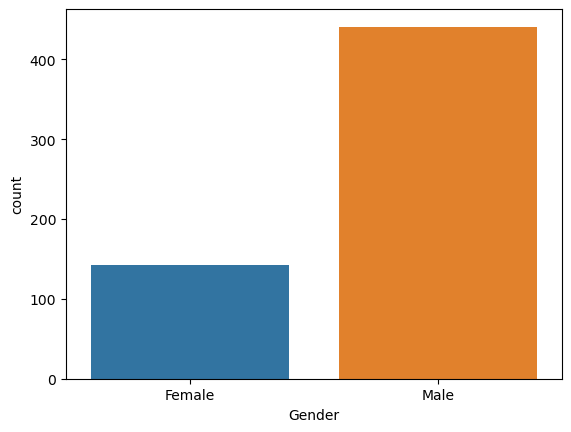

In [11]:
sns.countplot(x=data['Gender'], data=data)
m, f=data['Gender'].value_counts()
print("No. of Males: ", m)
print("No. of Females: ", f)

Liver disease patients:  416
Non-Liver disease patients:  167


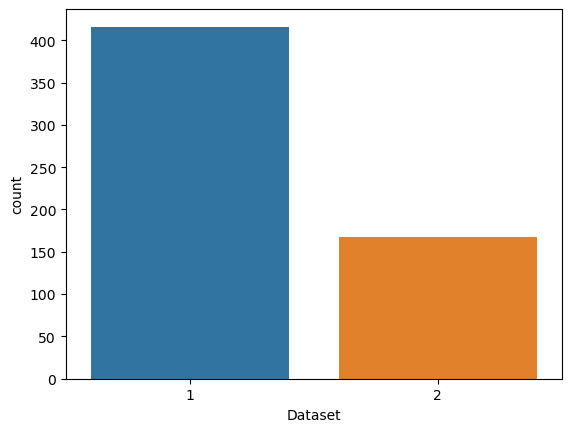

In [12]:
sns.countplot(x=data['Dataset'], data=data)
LD, NLD=data['Dataset'].value_counts()
print("Liver disease patients: ", LD)
print("Non-Liver disease patients: ", NLD)

In [13]:
x = data.iloc[:, 0:-1]
y = data.iloc[:, -1]

In [14]:
x

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40
...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00


In [15]:
y

0      1
1      1
2      1
3      1
4      1
      ..
578    2
579    1
580    1
581    1
582    2
Name: Dataset, Length: 583, dtype: int64

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.2)

In [17]:
x_train.shape

(466, 10)

In [18]:
x_test.shape

(117, 10)

In [19]:
le = LabelEncoder()

In [20]:
x_train_gender = le.fit_transform(x_train['Gender'])
x_test_gender = le.transform(x_test['Gender'])

In [21]:
le.classes_

array(['Female', 'Male'], dtype=object)

In [22]:
x_train_gender =x_train_gender.reshape(-1, 1)
x_test_gender = x_test_gender.reshape(-1, 1)

In [23]:
x_train = x_train.drop('Gender', axis=1)
x_test = x_test.drop('Gender', axis=1)

In [24]:
x_train_combined = np.concatenate((x_train.values, x_train_gender), axis=1)
x_test_combined = np.concatenate((x_test.values, x_test_gender), axis=1)

In [25]:
column_names = list(x_train.columns) + ['Gender']

In [26]:
x_train_final = pd.DataFrame(x_train_combined, columns=column_names)
x_test_final = pd.DataFrame(x_test_combined, columns=column_names)

In [27]:
print("Shape of x_train_combined:", x_train_final.shape)
print("Shape of x_test_combined:", x_test_final.shape)

Shape of x_train_combined: (466, 10)
Shape of x_test_combined: (117, 10)


In [28]:
x_train_final

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender
0,55.0,1.1,0.3,215.0,21.0,15.0,6.2,2.9,0.8,1.0
1,26.0,1.0,0.3,163.0,48.0,71.0,7.1,3.7,1.0,1.0
2,66.0,0.7,0.2,162.0,24.0,20.0,6.4,3.2,1.0,0.0
3,48.0,0.9,0.2,173.0,26.0,27.0,6.2,3.1,1.0,0.0
4,60.0,1.5,0.6,360.0,230.0,298.0,4.5,2.0,0.8,1.0
...,...,...,...,...,...,...,...,...,...,...
461,60.0,2.0,0.8,190.0,45.0,40.0,6.0,2.8,0.8,1.0
462,55.0,0.7,0.2,290.0,53.0,58.0,6.8,3.4,1.0,1.0
463,69.0,0.8,0.2,146.0,42.0,70.0,8.4,4.9,1.4,0.0
464,60.0,2.3,0.6,272.0,79.0,51.0,6.6,3.5,1.1,1.0


In [29]:
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train_final, y_train)

LogisticRegression(max_iter=1000)

In [30]:
y_pred_lr = lr.predict(x_test_final)

In [31]:
lr_acc = accuracy_score(y_pred_lr, y_test)
lr_acc

0.6923076923076923

In [32]:
lr_cross = cross_val_score(lr, x_train_final, y_train, scoring='accuracy', cv = 6)
lr_cross.mean()

0.733932733932734

In [33]:
svm = SVC()
svm.fit(x_train_final, y_train)

SVC()

In [34]:
y_pred_svm = svm.predict(x_test_final)

In [35]:
svm_acc = accuracy_score(y_pred_svm, y_test)
svm_acc

0.6666666666666666

In [36]:
svm_cross = cross_val_score(svm, x_train_final, y_train, scoring='accuracy', cv = 6)
svm_cross.mean()

0.7253302253302253

In [37]:
rfc = RandomForestClassifier()
rfc.fit(x_train_final, y_train)

RandomForestClassifier()

In [38]:
ypred_rfc = rfc.predict(x_test_final)

In [39]:
rfc_acc = accuracy_score(ypred_rfc, y_test)
rfc_acc

0.6923076923076923

In [40]:
rfc_cross = cross_val_score(rfc, x_train_final, y_train, scoring='accuracy', cv = 6)
rfc_cross.mean()

0.7447829947829946

In [41]:
knn = KNeighborsClassifier()
knn.fit(x_train_final, y_train)

KNeighborsClassifier()

In [42]:
ypred_knn = knn.predict(x_test_final)

In [43]:
knn_acc = accuracy_score(ypred_knn, y_test)
knn_acc


0.6410256410256411

In [44]:
knn_cross = cross_val_score(knn, x_train_final, y_train, scoring='accuracy', cv = 6)
knn_cross.mean()

0.6931401931401932

In [45]:
knn_cm = confusion_matrix(ypred_knn,y_test)
knn_cm

array([[64, 28],
       [14, 11]], dtype=int64)

In [46]:
pickle.dump(svm, open('liver_analysis.pkl', 'wb'))